In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
df = pd.read_csv(r"D:\AI\project\time_series_dataset24.csv")
df.head()

,PIN1,PTC,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,Patm,...,FricTorque,Pin,Pdiff,GV,AGV,ATB1,ATB2,Group,Stage,Head
0,0.002862,0.001300,0.004675,0.004430,0.006501,0.005931,0.006195,0.020413,0.024108,6.285425,...,1.246962,6.118898,6.649683,2.636216,0.297385,-0.163528,0.224599,DPL,1,24
1,0.002862,0.001297,0.004674,0.004431,0.006519,0.005950,0.006197,0.020705,0.022757,6.291337,...,1.250575,6.142219,6.677930,2.635310,0.205243,-0.051941,0.307536,DPL,1,24
2,0.002862,0.001292,0.004673,0.004432,0.006524,0.005949,0.006208,0.021536,0.021985,6.287724,...,1.245649,6.096892,6.639173,2.634754,0.124694,-0.024502,0.252041,DPL,1,24
3,0.002863,0.001287,0.004673,0.004432,0.006537,0.005971,0.006211,0.021012,0.020271,6.283783,...,1.266670,6.125139,6.676617,2.634428,0.108219,-0.042185,0.274605,DPL,1,24
4,0.002865,0.001284,0.004673,0.004431,0.006531,0.005995,0.006229,0.019912,0.018715,6.288381,...,1.247619,6.032514,6.704535,2.634260,0.229651,-0.048283,0.203255,DPL,1,24


In [7]:
df = df.drop(['PIN1','PTC','WTmp','Head','Patm','rpm','Speed','Flow','Thrust','GenTorque','FricTorque','Pin','Pdiff','GV','AGV','Group'], axis= 1)
print(df)

              PDT1      PDT2      PGV1      PGV2      PGV3      PDT3  \
0         0.004675  0.004430  0.006501  0.005931  0.006195  0.020413   
1         0.004674  0.004431  0.006519  0.005950  0.006197  0.020705   
2         0.004673  0.004432  0.006524  0.005949  0.006208  0.021536   
3         0.004673  0.004432  0.006537  0.005971  0.006211  0.021012   
4         0.004673  0.004431  0.006531  0.005995  0.006229  0.019912   
...            ...       ...       ...       ...       ...       ...   
13823995  0.004092  0.003841  0.007138  0.006577  0.006932  0.021125   
13823996  0.004089  0.003838  0.007111  0.006554  0.006877  0.022708   
13823997  0.004089  0.003834  0.007081  0.006527  0.006842  0.027942   
13823998  0.004087  0.003829  0.007069  0.006505  0.006827  0.026696   
13823999  0.004087  0.003825  0.007050  0.006499  0.006802  0.024260   

              PDT4      ATB1      ATB2  Stage  
0         0.024108 -0.163528  0.224599      1  
1         0.022757 -0.051941  0.307536 

In [9]:
df.describe()

,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,ATB1,ATB2,Stage
count,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07,1.382400e+07
mean,4.185383e-03,3.998926e-03,6.824056e-03,6.234548e-03,6.518264e-03,1.580522e-03,2.985500e-02,5.430853e-02,2.237140e-01,5.000000e+00
std,2.615657e-04,2.615540e-04,2.192709e-04,2.361749e-04,2.476605e-04,2.693532e-02,3.290781e-02,1.488443e-01,8.080445e-02,2.581989e+00
min,3.586823e-03,3.416184e-03,6.256052e-03,5.653877e-03,5.940202e-03,-2.374360e-01,-1.927378e-01,-9.489064e-01,-2.864382e-01,1.000000e+00
25%,3.970604e-03,3.788538e-03,6.672106e-03,6.035407e-03,6.307906e-03,-1.558711e-02,8.848731e-03,-4.157518e-02,1.697143e-01,3.000000e+00
50%,4.074363e-03,3.883342e-03,6.877292e-03,6.218435e-03,6.500501e-03,1.652547e-03,2.963448e-02,5.415802e-02,2.239891e-01,5.000000e+00
75%,4.417677e-03,4.238868e-03,7.005304e-03,6.435537e-03,6.731146e-03,1.896362e-02,5.121741e-02,1.505010e-01,2.776541e-01,7.000000e+00
max,4.909591e-03,4.725817e-03,7.322668e-03,6.839041e-03,7.161443e-03,2.016533e-01,2.367085e-01,1.288933e+00,6.697745e-01,9.000000e+00


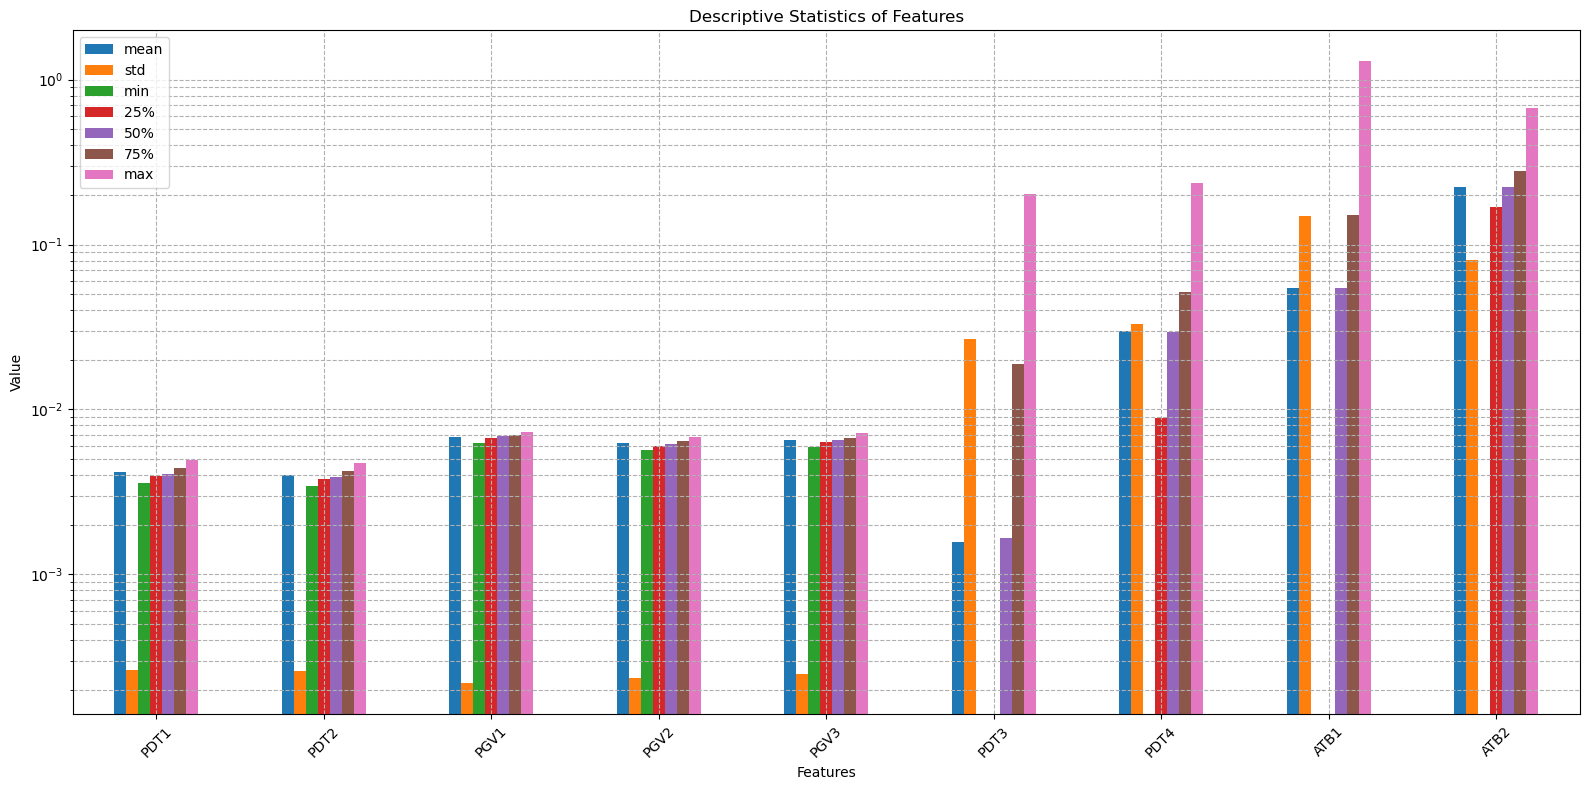

In [11]:
import matplotlib.pyplot as plt

# Get descriptive stats and transpose
desc = df.describe().T

# Drop 'Stage' if present
desc = desc.drop(index='Stage', errors='ignore')

# Select stats to plot (including percentiles)
stats_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Plot bar chart with log scale on y-axis
desc[stats_to_plot].plot(kind='bar', figsize=(16, 8), logy=True)

plt.title("Descriptive Statistics of Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle='--')
plt.tight_layout()
plt.show()


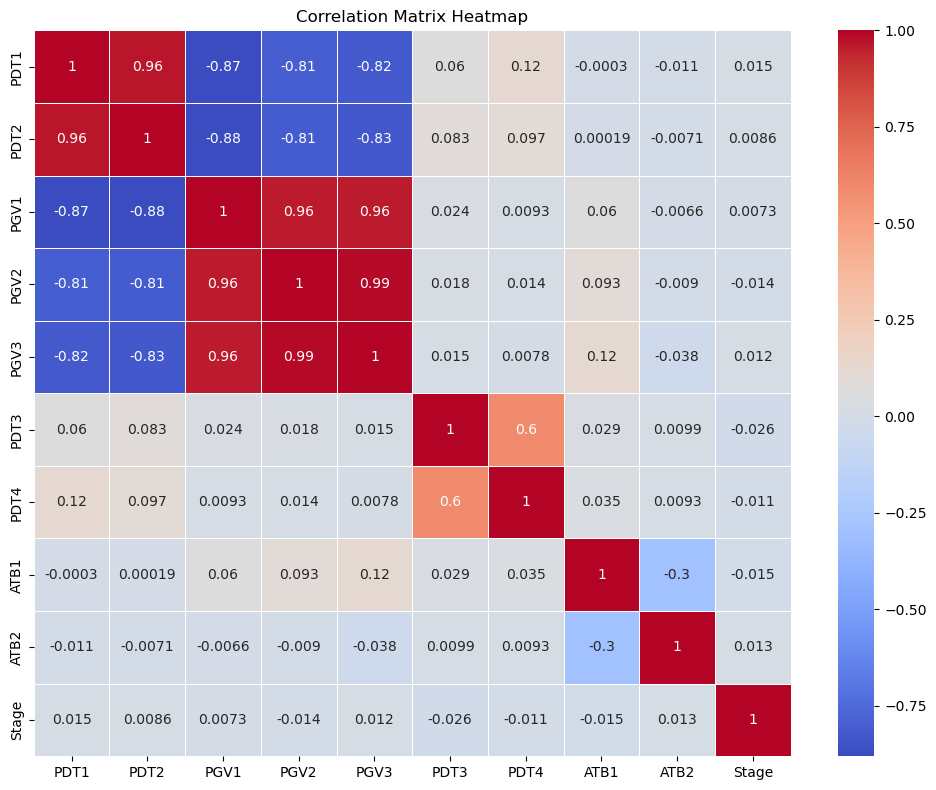

In [13]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

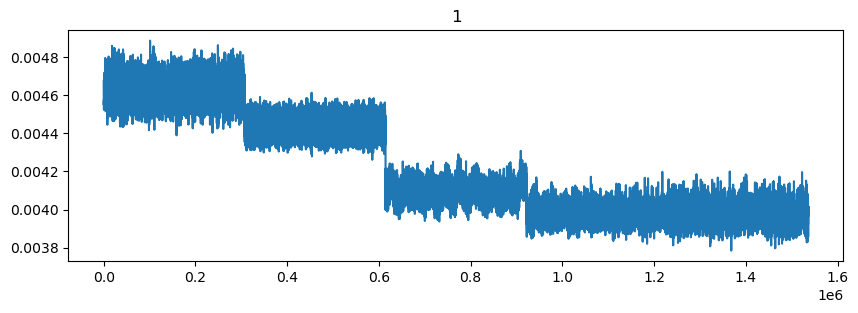

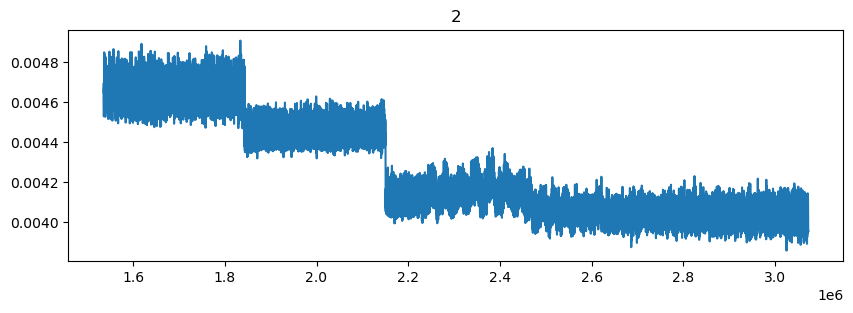

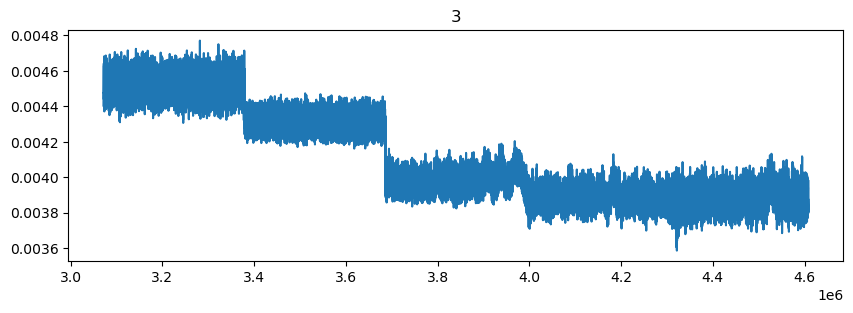

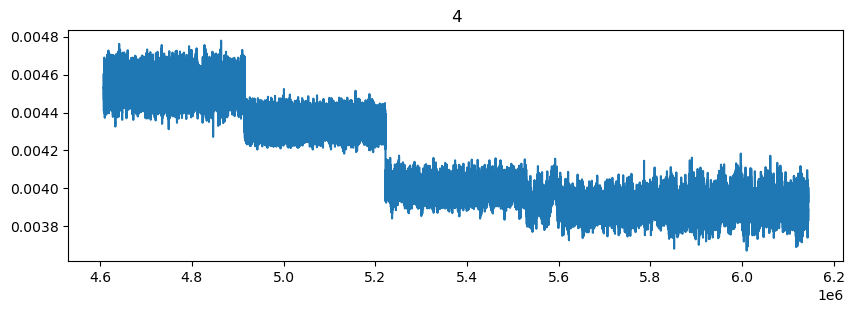

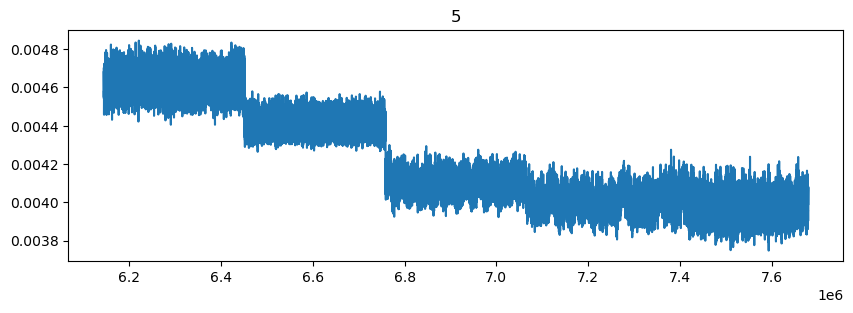

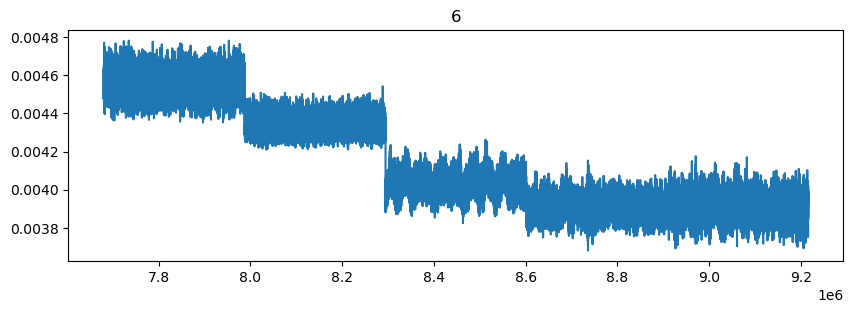

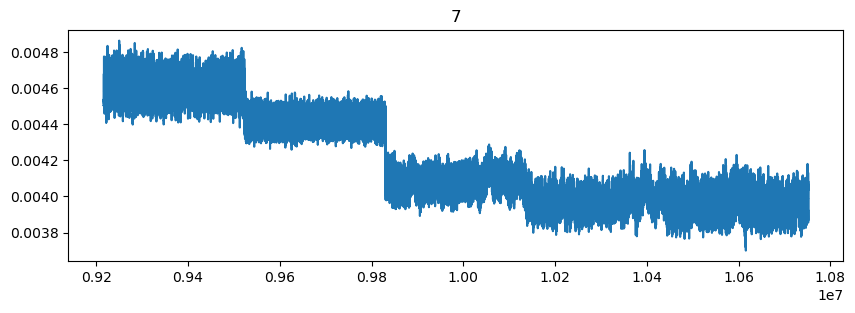

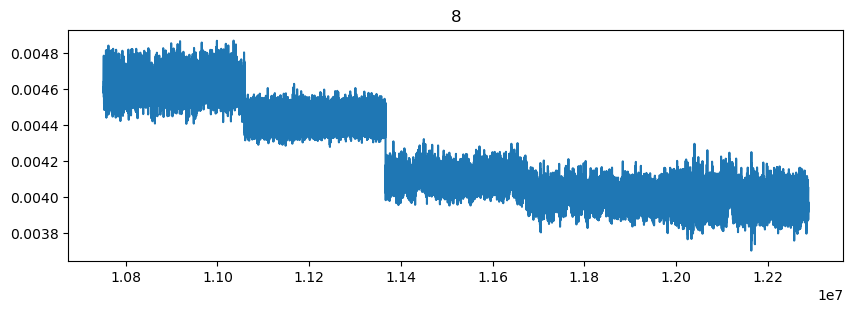

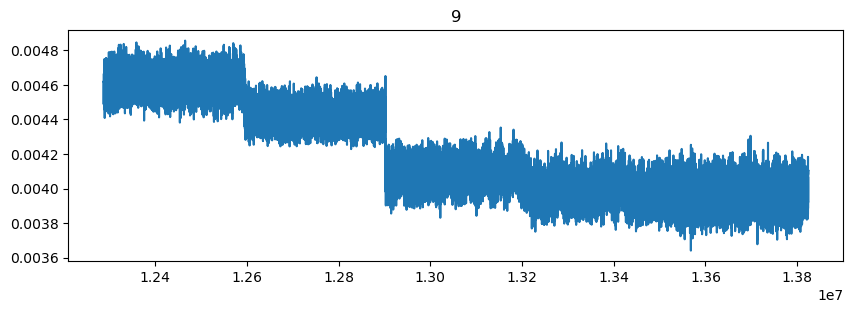

In [21]:
Stage = df['Stage'].unique()
for  f in Stage:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['Stage']==f].iloc[:,0])
    plt.title(f)
    plt.show()

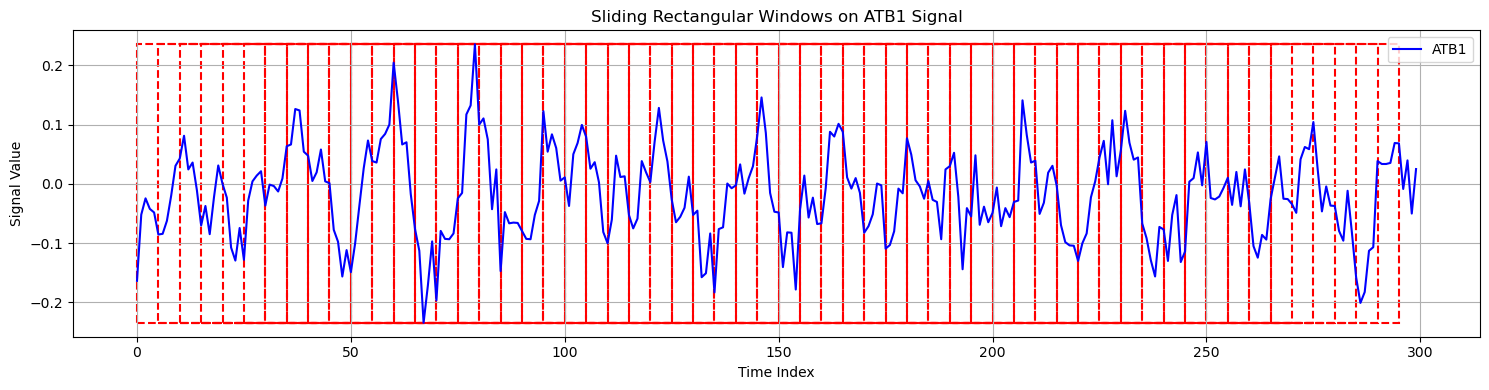

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Signal to visualize
signal = df['ATB1'].values
labels = df['Stage'].values
window_size = 30
stride = 5

# Pick a small range to plot (e.g., first 300 samples)
start_index = 0
end_index = 300
signal_to_plot = signal[start_index:end_index]
label_to_plot = labels[start_index:end_index]

# Plot the signal
plt.figure(figsize=(15, 4))
plt.plot(np.arange(start_index, end_index), signal_to_plot, label='ATB1', color='blue')

# Overlay sliding windows with rectangular patches
for i in range(start_index, end_index - window_size, stride):
    rect = patches.Rectangle((i, min(signal_to_plot)), window_size, 
                             max(signal_to_plot)-min(signal_to_plot), 
                             linewidth=1.5, edgecolor='red', facecolor='none', linestyle='--')
    plt.gca().add_patch(rect)

plt.title("Sliding Rectangular Windows on ATB1 Signal")
plt.xlabel("Time Index")
plt.ylabel("Signal Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


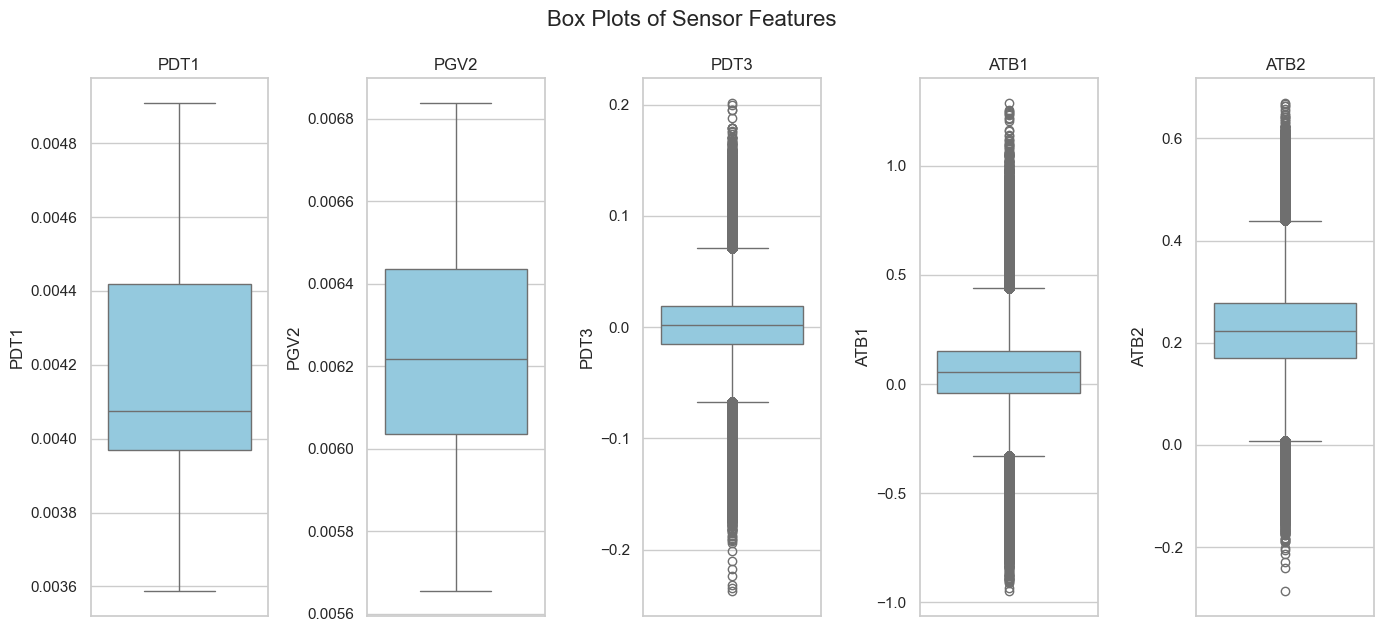

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set style
sns.set(style="whitegrid")

# Define features to plot
features = ['PDT1', 'PGV2', 'PDT3', 'ATB1', 'ATB2']

# Create box plots
plt.figure(figsize=(14, 6))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(feature)
    plt.tight_layout()

plt.suptitle('Box Plots of Sensor Features', fontsize=16, y=1.05)
plt.show()

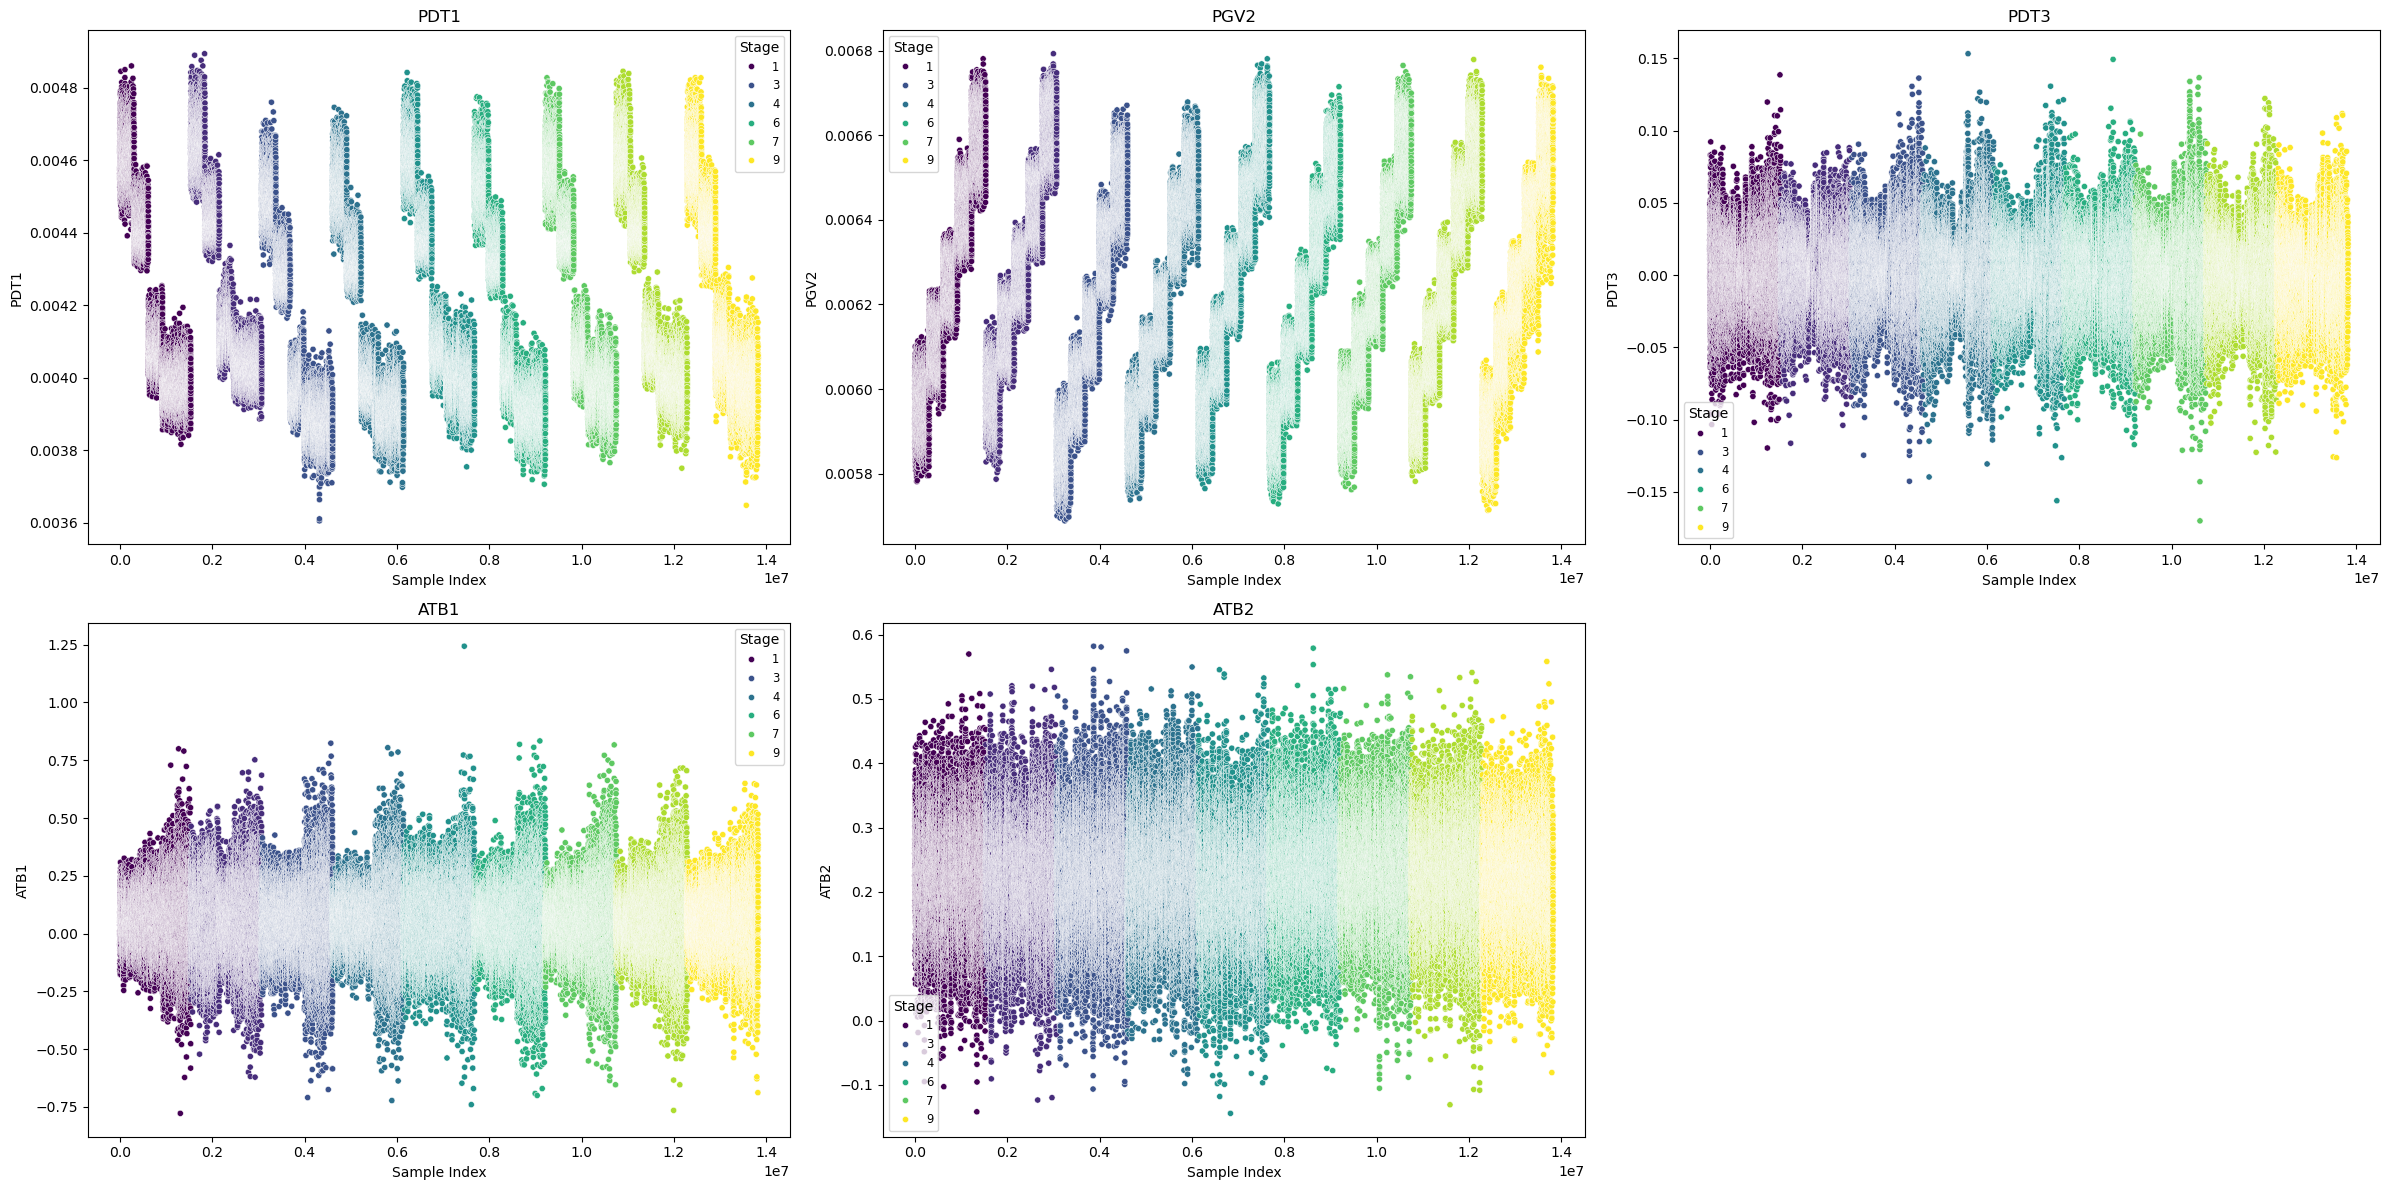

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['PDT1', 'PGV2', 'PDT3', 'ATB1', 'ATB2']
sample_indices = np.arange(0, len(df), 100)  # every 100th index
df_sampled = df.iloc[::100, :]  # sampled data

plt.figure(figsize=(24, 12))  # bigger figure for 2 rows

for i, feat in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.scatterplot(x=sample_indices, y=df_sampled[feat], hue=df_sampled['Stage'], palette='viridis', s=20)
    plt.title(feat)
    plt.xlabel("Sample Index")
    plt.ylabel(feat)
    plt.legend(title='Stage', loc='best', fontsize='small')
    plt.tight_layout()

# Hide the unused subplot (6th plot)
plt.subplot(2, 3, 6).axis('off')

plt.show()
